## Dogs vs. Cats Classification

Select free T4 GPU in Runtime settings

## Download data

In [9]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG

Downloading...
From (original): https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG
From (redirected): https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG&confirm=t&uuid=c14f4f5e-f26c-468b-97f9-01ec5864defd
To: /content/dogs-vs-cats.zip
100% 852M/852M [00:05<00:00, 163MB/s]


In [10]:
import zipfile

with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_file:
    zip_file.extractall('data')

with zipfile.ZipFile('data/train.zip', 'r') as zip_file:
    zip_file.extractall('data/')

In [11]:
import os
import shutil
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Paths
base_dir = 'data/train'
train_dir = 'data/train_split'
val_dir = 'data/val_split'

# Create directories
os.makedirs(os.path.join(train_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'cats'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'cats'), exist_ok=True)

# Split data
filenames = os.listdir(base_dir)
train_files, val_files = train_test_split(filenames, test_size=0.2, random_state=42)

for file in train_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'dogs', file))
    elif 'cat' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'cats', file))

for file in val_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'dogs', file))
    elif 'cat' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'cats', file))

## Create data generators

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Create basic CNN classification model

In [14]:
from tensorflow.keras import models, layers

# Build the model
model_basic = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_basic.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Train basic model

In [7]:
history_model_basic = model_basic.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.5917 - loss: 0.6602 - val_accuracy: 0.7544 - val_loss: 0.5114
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.7657 - loss: 0.4789 - val_accuracy: 0.7864 - val_loss: 0.4578
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.8247 - loss: 0.3892 - val_accuracy: 0.8190 - val_loss: 0.4159
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.8625 - loss: 0.3183 - val_accuracy: 0.8212 - val_loss: 0.4126
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.9047 - loss: 0.2322 - val_accuracy: 0.8216 - val_loss: 0.4347
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.9483 - loss: 0.1352 - val_accuracy: 0.8292 - val_loss: 0.5238
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.9760 - loss: 0.0695 - val_accuracy: 0.8258 - val_loss: 0.6317
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.9864 - loss: 0.0437 - val_accurac

## Plot accuracy and loss

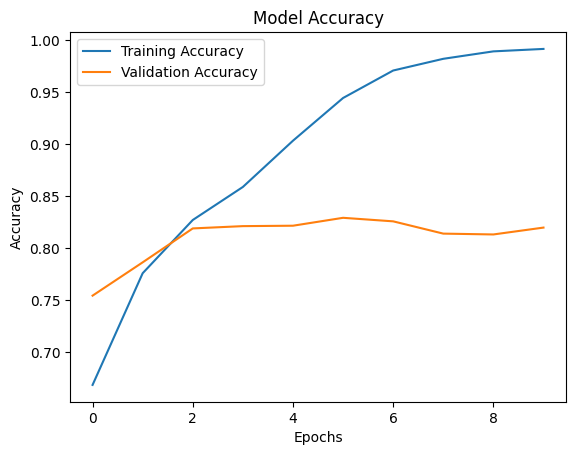

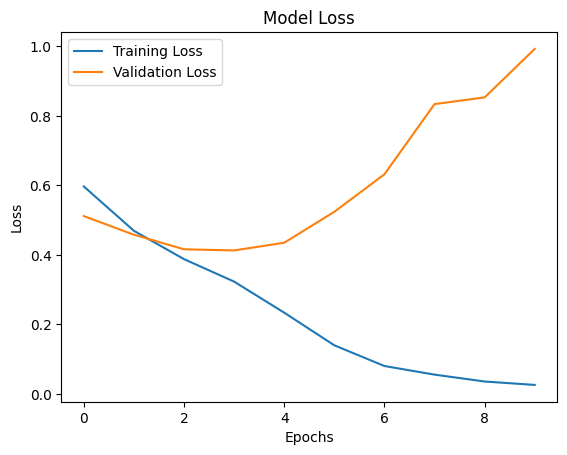

In [8]:
plt.plot(history_model_basic.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_basic.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_model_basic.history['loss'], label='Training Loss')
plt.plot(history_model_basic.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Tasks

## Add regularization

- Copy the model from above and rename
- Add different regularization methods as described in the lab instructions and evaluate results.




# Task 2.2: Dropout Regularization

In [15]:
# Task 2.2: Dropout Regularization
print("=== Task 2.2: Dropout Regularization ===")
model_dropout = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),  # Add dropout after flatten
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout before output
    layers.Dense(1, activation='sigmoid')
])

model_dropout.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history_dropout = model_dropout.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

=== Task 2.2: Dropout Regularization ===
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 56ms/step - accuracy: 0.5917 - loss: 0.6563 - val_accuracy: 0.7376 - val_loss: 0.5207
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.7420 - loss: 0.5187 - val_accuracy: 0.7772 - val_loss: 0.4776
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.7939 - loss: 0.4424 - val_accuracy: 0.8010 - val_loss: 0.4287
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.8223 - loss: 0.3902 - val_accuracy: 0.8236 - val_loss: 0.3830
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.8521 - loss: 0.3461 - val_accuracy: 0.8434 - val_loss: 0.3629
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.8667 - loss: 0.3104 - val_accuracy: 0.8516 - val_loss: 0.3429
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.8767 - loss: 0.2885 - val_accuracy: 0.8546 - val_loss: 0.3442
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/

# Task 2.3: L2 Weight Regularization

In [16]:
# Task 2.3: L2 Weight Regularization
print("=== Task 2.3: L2 Weight Regularization ===")
model_l2 = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001))
])

model_l2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_l2 = model_l2.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

=== Task 2.3: L2 Weight Regularization ===
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 55ms/step - accuracy: 0.5679 - loss: 0.7721 - val_accuracy: 0.7190 - val_loss: 0.5727
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.7298 - loss: 0.5568 - val_accuracy: 0.7888 - val_loss: 0.4818
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.7879 - loss: 0.4829 - val_accuracy: 0.8082 - val_loss: 0.4514
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.8145 - loss: 0.4449 - val_accuracy: 0.8126 - val_loss: 0.4431
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.8340 - loss: 0.4126 - val_accuracy: 0.8264 - val_loss: 0.4267
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.8546 - loss: 0.3752 - val_accuracy: 0.8322 - val_loss: 0.4163
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.8702 - loss: 0.3460 - val_accuracy: 0.8396 - val_loss: 0.4184
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54m

#Task 2.4: Combine Dropout and L2

In [17]:
#Task 2.4: Combine Dropout and L2
print("=== Task 2.4: Combine Dropout and L2 ===")
model_combined = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001))
])

model_combined.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_combined = model_combined.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

=== Task 2.4: Combine Dropout and L2 ===
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 55ms/step - accuracy: 0.5672 - loss: 0.7316 - val_accuracy: 0.7232 - val_loss: 0.6102
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.7275 - loss: 0.6044 - val_accuracy: 0.7626 - val_loss: 0.5712
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.7588 - loss: 0.5813 - val_accuracy: 0.7926 - val_loss: 0.5396
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.7868 - loss: 0.5575 - val_accuracy: 0.8052 - val_loss: 0.5207
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.8009 - loss: 0.5364 - val_accuracy: 0.8026 - val_loss: 0.5284
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.8252 - loss: 0.4962 - val_accuracy: 0.8368 - val_loss: 0.4893
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.8343 - loss: 0.4833 - val_accuracy: 0.8124 - val_loss: 0.5116
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/

# Task 2.5: Early Stopping

In [18]:
# Task 2.5: Early Stopping
print("=== Task 2.5: Early Stopping ===")
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model_early_stop = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_early_stop.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_early_stop = model_early_stop.fit(
    train_generator,
    epochs=20,  # More epochs since early stopping will handle overfitting
    validation_data=val_generator,
    callbacks=[early_stopping]
)

=== Task 2.5: Early Stopping ===
Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 55ms/step - accuracy: 0.5785 - loss: 0.6669 - val_accuracy: 0.7300 - val_loss: 0.5460
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.7372 - loss: 0.5332 - val_accuracy: 0.7496 - val_loss: 0.4889
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.7864 - loss: 0.4579 - val_accuracy: 0.8040 - val_loss: 0.4284
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.8219 - loss: 0.3944 - val_accuracy: 0.8182 - val_loss: 0.4053
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.8435 - loss: 0.3574 - val_accuracy: 0.8280 - val_loss: 0.3838
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.8583 - loss: 0.3246 - val_accuracy: 0.8380 - val_loss: 0.3676
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.8801 - loss: 0.2859 - val_accuracy: 0.8376 - val_loss: 0.3715
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - a

# Task 2.6: Data Augmentation

In [19]:
# Task 2.6: Data Augmentation
print("=== Task 2.6: Data Augmentation ===")
# Create augmented data generator
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

# Keep validation generator unchanged (rescaling only)
val_datagen_aug = ImageDataGenerator(rescale=1./255)

train_generator_aug = train_datagen_aug.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator_aug = val_datagen_aug.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

=== Task 2.6: Data Augmentation ===
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [20]:
# Model with data augmentation
model_augmented = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_augmented.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_augmented = model_augmented.fit(
    train_generator_aug,
    epochs=10,
    validation_data=val_generator_aug,
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 194ms/step - accuracy: 0.5502 - loss: 0.6926 - val_accuracy: 0.6624 - val_loss: 0.6123
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 121s 193ms/step - accuracy: 0.6507 - loss: 0.6229 - val_accuracy: 0.7166 - val_loss: 0.5405
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 121s 194ms/step - accuracy: 0.7011 - loss: 0.5712 - val_accuracy: 0.7774 - val_loss: 0.4768
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 121s 194ms/step - accuracy: 0.7301 - loss: 0.5344 - val_accuracy: 0.7888 - val_loss: 0.4652
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 121s 194ms/step - accuracy: 0.7461 - loss: 0.5198 - val_accuracy: 0.8002 - val_loss: 0.4387
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 121s 194ms/step - accuracy: 0.7583 - loss: 0.5059 - val_accuracy: 0.8176 - val_loss: 0.4141
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 121s 194ms/step - accuracy: 0.7548 - loss: 0.4977 - val_accuracy: 0.7882 - val_loss: 0.4578
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 121s 193ms/step - accuracy: 0.7732 -

# Task 3: Evaluation and Comparison

In [21]:
print("=== Task 3: Evaluation and Comparison ===")

# Create summary table
results_summary = []

models_history = {
    'Baseline': history_model_basic,
    'Dropout': history_dropout,
    'L2': history_l2,
    'Combined': history_combined,
    'Early Stopping': history_early_stop,
    'Data Augmentation': history_augmented
}

for name, history in models_history.items():
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    epochs_trained = len(history.history['accuracy'])

    results_summary.append({
        'Model': name,
        'Training Accuracy': f"{final_train_acc:.4f}",
        'Validation Accuracy': f"{final_val_acc:.4f}",
        'Epochs': epochs_trained
    })

# Display summary table
summary_df = pd.DataFrame(results_summary)
print("\nSummary Table:")
print(summary_df.to_string(index=False))

=== Task 3: Evaluation and Comparison ===

Summary Table:
            Model Training Accuracy Validation Accuracy  Epochs
         Baseline            0.9915              0.8198      10
          Dropout            0.9169              0.8554      10
               L2            0.9013              0.8436      10
         Combined            0.8579              0.8528      10
   Early Stopping            0.9299              0.8554      12
Data Augmentation            0.7986              0.8624      10


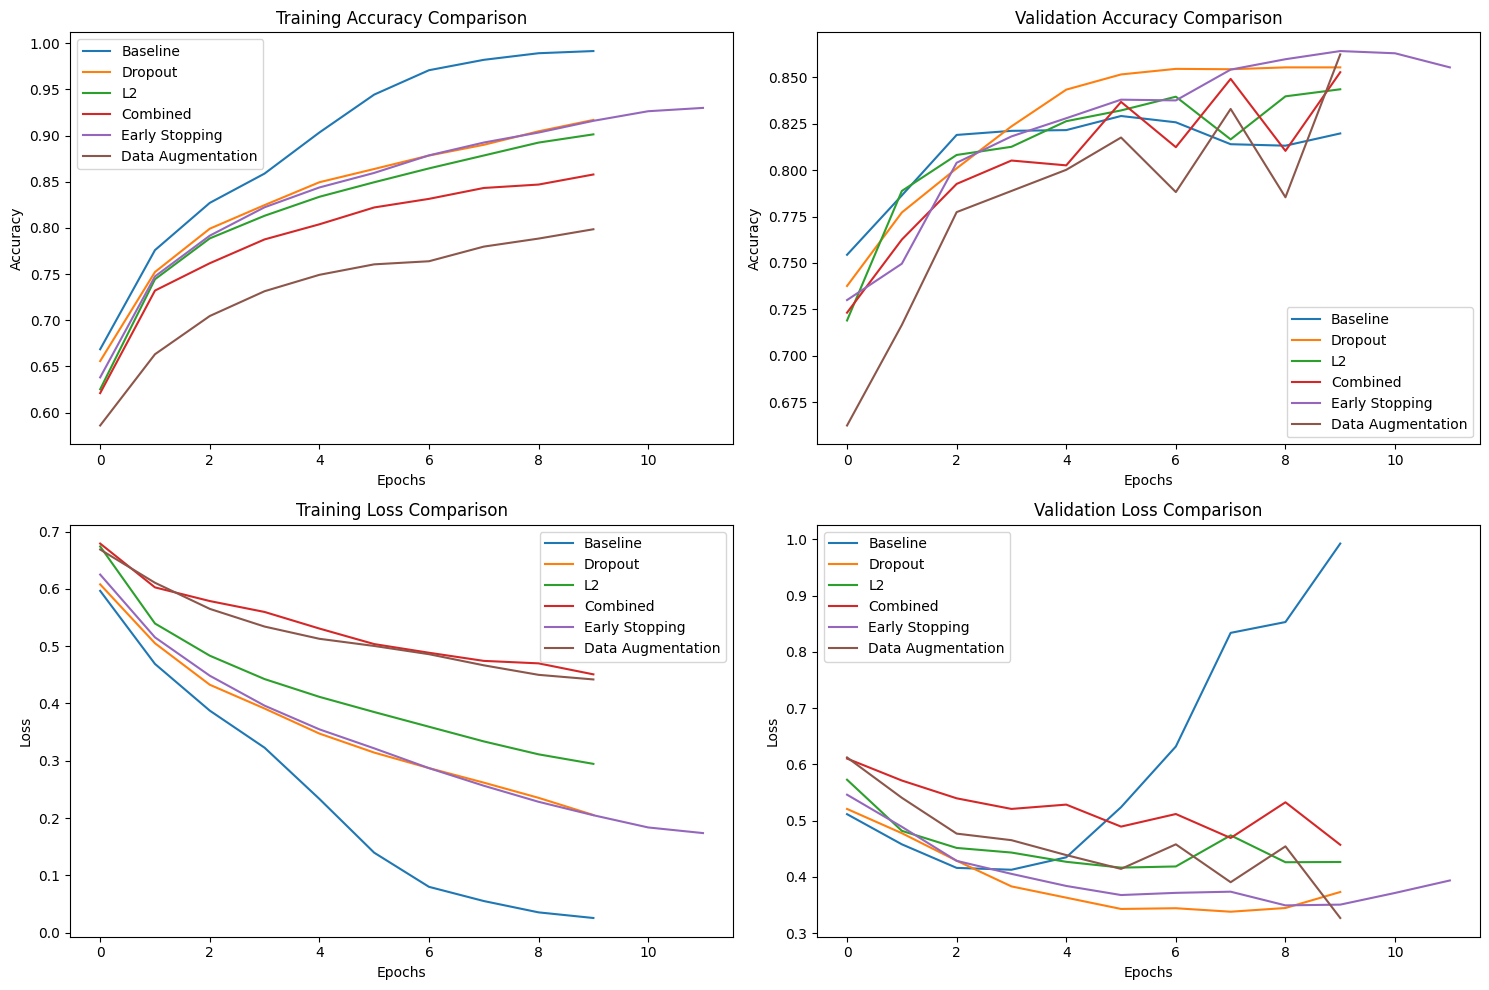

In [22]:
# Plot comparison of all models
plt.figure(figsize=(15, 10))

# Training accuracy comparison
plt.subplot(2, 2, 1)
for name, history in models_history.items():
    plt.plot(history.history['accuracy'], label=name)
plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Validation accuracy comparison
plt.subplot(2, 2, 2)
for name, history in models_history.items():
    plt.plot(history.history['val_accuracy'], label=name)
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training loss comparison
plt.subplot(2, 2, 3)
for name, history in models_history.items():
    plt.plot(history.history['loss'], label=name)
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Validation loss comparison
plt.subplot(2, 2, 4)
for name, history in models_history.items():
    plt.plot(history.history['val_loss'], label=name)
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


=== Confusion Matrix for Combined Model ===
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step


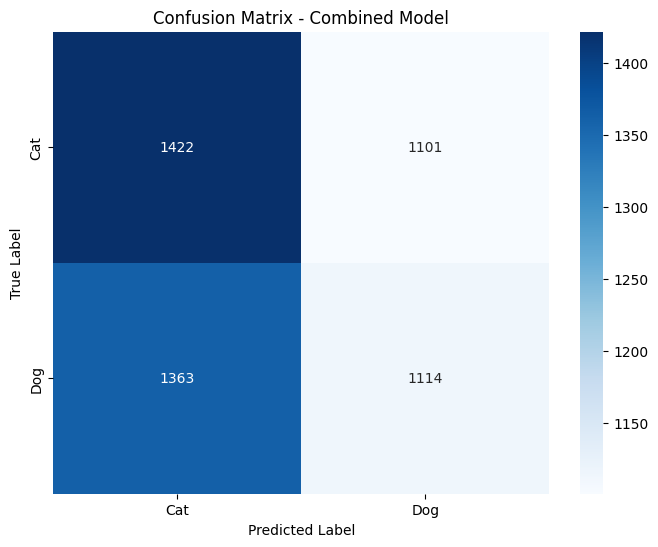

In [23]:
# Confusion Matrix for best model (you can change this to any model)
print("\n=== Confusion Matrix for Combined Model ===")
# Get predictions
val_generator.reset()
predictions = model_combined.predict(val_generator)
predicted_classes = (predictions > 0.5).astype(int)

# Get true labels
true_classes = val_generator.classes

# Create confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title('Confusion Matrix - Combined Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [24]:
# Classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes,
                          target_names=['Cat', 'Dog']))


Classification Report:
              precision    recall  f1-score   support

         Cat       0.51      0.56      0.54      2523
         Dog       0.50      0.45      0.47      2477

    accuracy                           0.51      5000
   macro avg       0.51      0.51      0.51      5000
weighted avg       0.51      0.51      0.51      5000



# Display a few misclassified images


=== Displaying Some Misclassified Images ===
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step
Found 2488 misclassified images


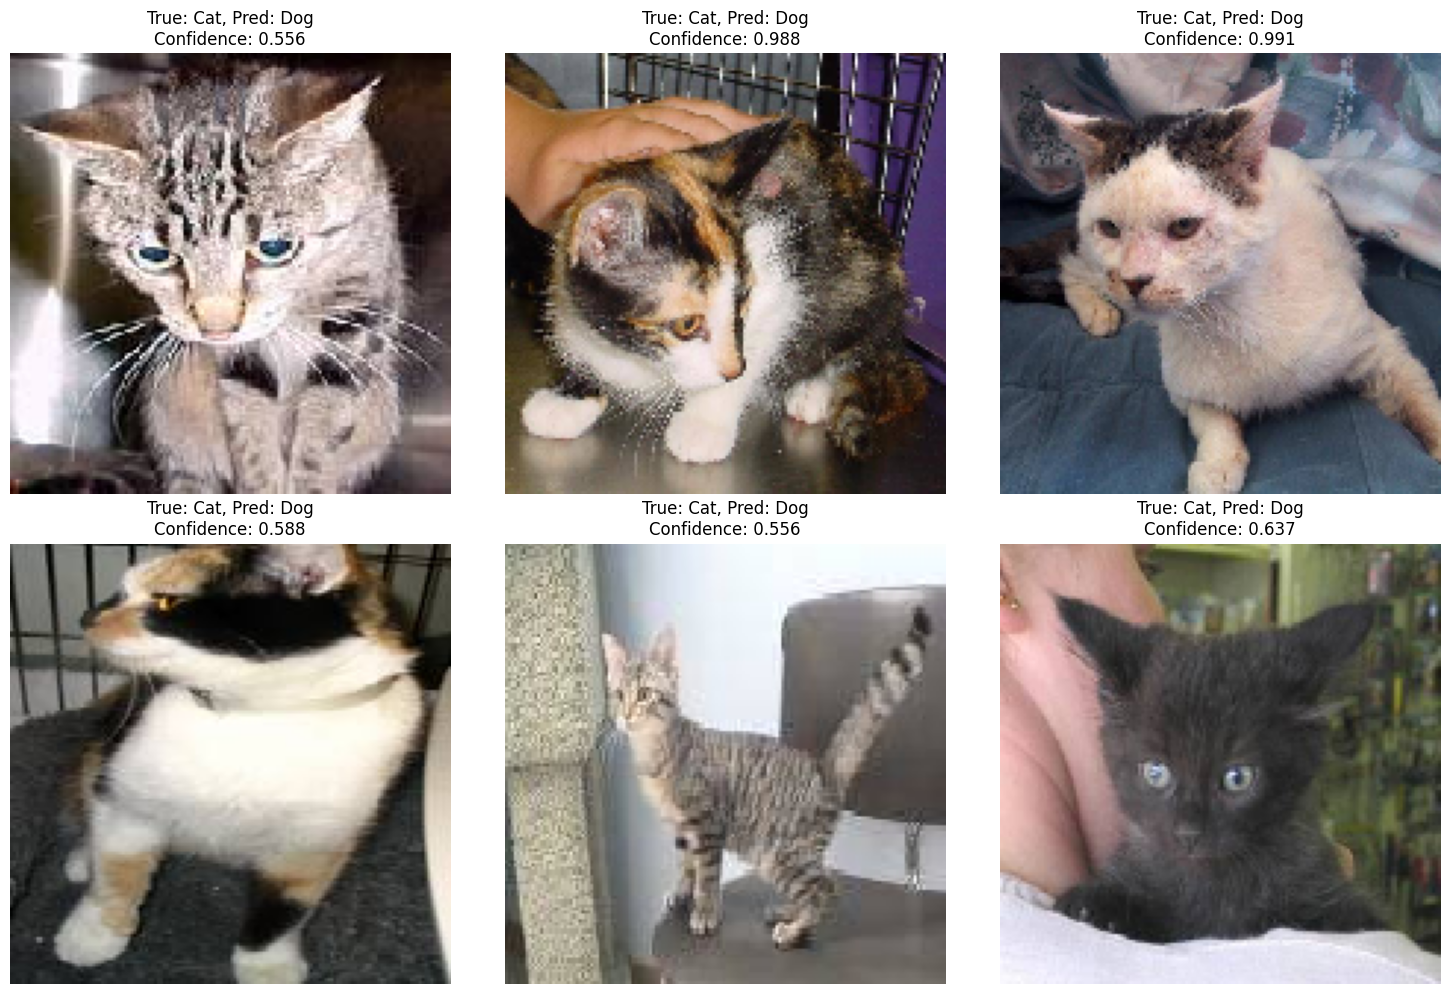


Misclassification Analysis:
Total misclassified: 2488 out of 5000
Misclassification rate: 49.76%
Average confidence of misclassified images: 0.852
Confidence range: 0.500 - 1.000


In [26]:

# Display a few misclassified images - FIXED VERSION
print("\n=== Displaying Some Misclassified Images ===")
import random
from tensorflow.keras.preprocessing import image
import numpy as np

# Get predictions and true labels
val_generator.reset()
predictions = model_combined.predict(val_generator)
predicted_classes = (predictions > 0.5).astype(int)

# Get true labels - need to get them in the correct order
true_classes = val_generator.classes
filenames = val_generator.filenames

# Get indices of misclassified images
misclassified_indices = np.where(true_classes != predicted_classes.flatten())[0]

if len(misclassified_indices) > 0:
    print(f"Found {len(misclassified_indices)} misclassified images")

    # Show first 6 misclassified images
    plt.figure(figsize=(15, 10))

    for i, idx in enumerate(misclassified_indices[:6]):
        plt.subplot(2, 3, i+1)

        # Get the actual filename and load the image
        img_path = os.path.join(val_dir, filenames[idx])

        # Load and display the image
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        plt.imshow(img_array.astype('uint8'))

        # Get labels and confidence
        true_class = true_classes[idx]
        pred_class = predicted_classes[idx][0]
        confidence = predictions[idx][0] if pred_class == 1 else 1-predictions[idx][0]

        class_names = ['Cat', 'Dog']
        true_name = class_names[true_class]
        pred_name = class_names[pred_class]

        plt.title(f'True: {true_name}, Pred: {pred_name}\nConfidence: {confidence:.3f}',
                 fontsize=12)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Additional analysis of misclassifications
    print(f"\nMisclassification Analysis:")
    print(f"Total misclassified: {len(misclassified_indices)} out of {len(true_classes)}")
    print(f"Misclassification rate: {len(misclassified_indices)/len(true_classes)*100:.2f}%")

    # Analyze confidence distribution of misclassified images
    misclassified_confidences = []
    for idx in misclassified_indices:
        pred_class = predicted_classes[idx][0]
        confidence = predictions[idx][0] if pred_class == 1 else 1-predictions[idx][0]
        misclassified_confidences.append(confidence)

    print(f"Average confidence of misclassified images: {np.mean(misclassified_confidences):.3f}")
    print(f"Confidence range: {np.min(misclassified_confidences):.3f} - {np.max(misclassified_confidences):.3f}")

else:
    print("No misclassified images found!")